## Avila Bible


Bu, Milli Kütüphane'deki en büyük ve en muhteşem kodlardan biridir. Süsleme, zıt İtalyan ve İspanyol stillerine sahiptir. İtalyan dekorasyonu kitapların yazarlarını tasvir eder ve aynı tonda daha açık arka planlar üzerinde ışıklı veya kırmızı, mavi, sarı ve koyu yeşil renklerde çok sayıda başlık içerir. Nuh'un Gemisi, İncil yazarlarının sembolleri ve İsa'nın hayatından sahneler gibi konuların sıra dışı iç içe baş harfleri ve tam sayfa figüratif illüstrasyonları da bulunan İspanyol dekorasyonunda renkler değişiyor.
http://www.spainisculture.com/en/obras_de_excelencia/biblioteca_nacional_de_espana/biblia_de_avila_vitr_15_1.html

Avila İncili, 12. yüzyılda İtalya ve İspanya arasında üretilen İncil'in dev bir latince kopyasıdır. Avila İncil üzerinde yapılan araştırmalar 12 farklı yazarın varlığını kanıtlamıştır. (Paleografik analiz) Bu çalışmada Avila İnciline ait 800 görüntünün özelliklerini içeren bir veri seti kullanılmıştır. Veri setinde 11 farklı öznitelik bulunmaktadır. Bunlar:

- no: sıra numarası
- intercolumnar distance: Sütunlar arası mesafe
- upper margin: üst kenar boşluğu 
- lower margin: alt kenar boşluğu 
- exploitation: sütunun mürekkeple dolu kısmı
- rownumber	: (Satır numarası) geçerli sütundaki satır sayısı
- modular_ratio: el yazısı karakterin boyutunun tahmini
- interlinear_spacing: satırlar arası boşluk	
- weight: ağırlık (tek bir satırın mürekkeple dolu kısmı)
- peak_number : bir satırdaki karakter sayısının tahmini
- modinter_ratio: modular ratio/ interlinear spacing: 
- category: 8 yazar (Marcus, Clarius, Philippus, Coronavirucus, Mongucus, Paithonius, Ubuntius, Esequlius) 

Çalışmada sıralı olarak aşağıdaki analiz adımları gerçekleştirilmiştir:
* Numerik değişkenlere ait betimsel istatistiklere ulaşılmıştır. 
  * Numerik değişkenlerin normal dağılım gösterip göstermediğine çarpıklık ve basıklık değerleri ile karar verilmiş, aynı zamanda histogram ve boxplot grafiklerinden de faydalanılmıştır.
  * Veri setinde eksik veri bulunmamasına karşın aykırı gözlemler ile karşılaşılmıştır. Çeyreklik hesabı ile niteliklerde bulunan aykırı gözlemler sınıfının alt ve üst çeyrekliğine baskılanmıştır.
  * Bu işlemlerin ardından normal dağılıma ulaşılmıştır. 
* Kategorik değişkenlere ait dağılımlar verilmiş, örneklem sayısı az olan sınıflarda grup birleştirmesi yapılmıştır.
* Anova
* Korelasyon
* Lojistik Regresyon (scikit learn/stats models)
* Gradient Boosting
* Random Forest
* XGB Boosting

Veri setin için; https://archive.ics.uci.edu/ml/datasets/Avila

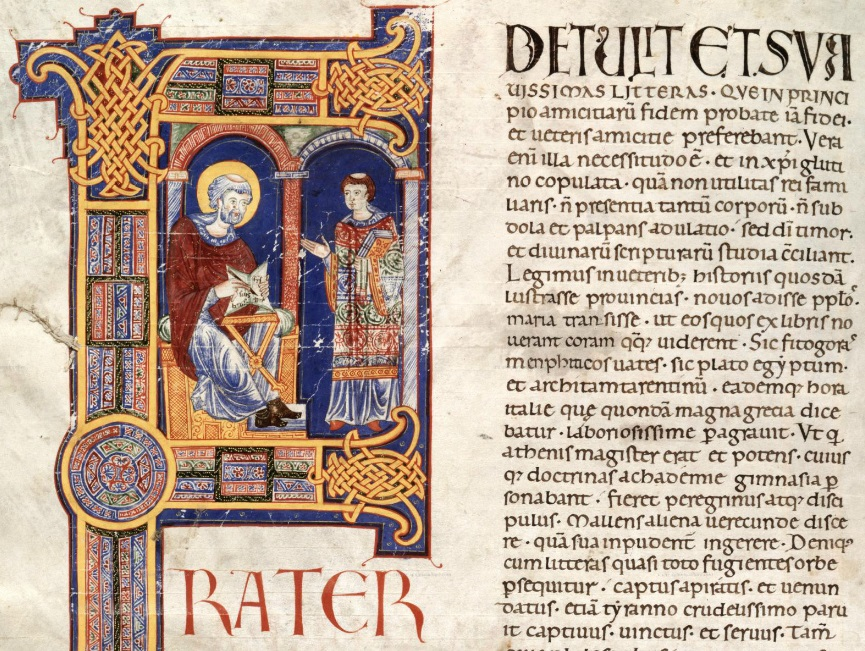


In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_dataset = pd.read_csv("training_dataset.csv", sep=",")

In [3]:
test_dataset= pd.read_csv("test_dataset.csv", sep=",")

In [4]:
train_dataset.head()

no  intercolumnar_distance  upper_margin  lower_margin  exploitation  \
0   0                0.241386      0.109171     -0.127126      0.380626   
1   1                0.303106      0.352558      0.082701      0.703981   
2   2               -0.116585      0.281897      0.175168     -0.152490   
3   3               -0.326430     -0.652394      0.384996     -1.694222   
4   4               -0.437525     -0.471816      0.463236     -0.545248   

   rownumber  modular_ratio  interlinear_spacing    weight  peak_number  \
0   0.172340       0.314889             0.484429  0.316412     0.188810   
1   0.261718      -0.391033             0.408929  1.045014     0.282354   
2   0.261718      -0.889332             0.371178 -0.024328     0.905984   
3  -0.185173      -1.138481            -0.232828 -1.747116    -1.183175   
4   0.261718      -0.972381             0.824183 -3.108388    -2.991700   

   modinter_ratio   category  
0        0.134922     Marcus  
1       -0.448209    Clarius  
2       -0.877830  Philippus  
3       -0.807380  Philippus  
4       -1.141030  Philippus

In [5]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12017 entries, 0 to 12016
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   no                      12017 non-null  int64  
 1   intercolumnar_distance  12017 non-null  float64
 2   upper_margin            12017 non-null  float64
 3   lower_margin            12017 non-null  float64
 4   exploitation            12017 non-null  float64
 5   rownumber               12017 non-null  float64
 6   modular_ratio           12017 non-null  float64
 7   interlinear_spacing     12017 non-null  float64
 8   weight                  12017 non-null  float64
 9   peak_number             12017 non-null  float64
 10  modinter_ratio          12017 non-null  float64
 11  category                12017 non-null  object 
dtypes: float64(10), int64(1), object(1)
memory usage: 1.1+ MB


In [6]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8012 entries, 0 to 8011
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   no                      8012 non-null   int64  
 1   intercolumnar_distance  8012 non-null   float64
 2   upper_margin            8012 non-null   float64
 3   lower_margin            8012 non-null   float64
 4   exploitation            8012 non-null   float64
 5   rownumber               8012 non-null   float64
 6   modular_ratio           8012 non-null   float64
 7   interlinear_spacing     8012 non-null   float64
 8   weight                  8012 non-null   float64
 9   peak_number             8012 non-null   float64
 10  modinter_ratio          8012 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 688.7 KB


In [7]:
train_dataset.describe().T

count         mean          std        min  \
no                      12017.0  6008.000000  3469.153427   0.000000   
intercolumnar_distance  12017.0     0.021280     1.004481  -3.498799   
upper_margin            12017.0     0.030684     3.661030  -2.426761   
lower_margin            12017.0    -0.000379     1.072319  -3.210528   
exploitation            12017.0    -0.022127     1.002045  -5.440122   
rownumber               12017.0     0.006801     0.963679  -4.922215   
modular_ratio           12017.0    -0.001279     1.108192  -7.450257   
interlinear_spacing     12017.0     0.032540     1.245215 -11.935457   
weight                  12017.0    -0.006720     1.012995  -4.164819   
peak_number             12017.0    -0.011368     1.085821  -5.486218   
modinter_ratio          12017.0    -0.026942     0.985799  -6.719324   

                                25%          50%          75%           max  
no                      3004.000000  6008.000000  9012.000000  12016.000000  
intercolumnar_distance    -0.128929     0.056229     0.216699     11.819916  
upper_margin              -0.259834    -0.055704     0.203385    386.000000  
lower_margin               0.064919     0.214288     0.349432     50.000000  
exploitation              -0.542563     0.080127     0.601905      3.987152  
rownumber                  0.172340     0.261718     0.261718      1.066121  
modular_ratio             -0.598658    -0.058835     0.522513     53.000000  
interlinear_spacing       -0.006326     0.220177     0.446679     83.000000  
weight                    -0.555747     0.101115     0.646377     13.173081  
peak_number               -0.372457     0.064084     0.500624     44.000000  
modinter_ratio            -0.528135    -0.053548     0.491862     11.911338

In [8]:
## Burada txt dosyamda category değişkeninden sonra iki boşluk olduğundan devamlı hata aldım. 
new_data = train_dataset.drop(["category","no"], axis=1)

## Dağılım Tespiti ve Aykırı Değer Analizi

In [9]:
col = new_data.columns

In [10]:
for i in col:
    skewness = new_data[i].skew()
    kurtosis = new_data[i].kurt()
    
    if -3 < skewness and kurtosis < 3:
        print(f"{skewness} ve {kurtosis} değerlerinden dolayı {i} normal dağılım gösterir")
    else:
        print(f"{skewness} ve {kurtosis} değerlerinden dolayı {i} normal dağılım göstermez")
        

2.7611565412134413 ve 41.03381490247558 değerlerinden dolayı intercolumnar_distance normal dağılım göstermez
97.83563176600411 ve 10285.510079759077 değerlerinden dolayı upper_margin normal dağılım göstermez
7.182286525781101 ve 399.2163091076196 değerlerinden dolayı lower_margin normal dağılım göstermez
-0.9409732393989589 ve 3.7315458794040417 değerlerinden dolayı exploitation normal dağılım göstermez
-3.7519613466018154 ve 15.475524410372547 değerlerinden dolayı rownumber normal dağılım göstermez
9.412542937019133 ve 437.32789461864735 değerlerinden dolayı modular_ratio normal dağılım göstermez
22.273995072452124 ve 1655.8755827813397 değerlerinden dolayı interlinear_spacing normal dağılım göstermez
-0.43882836250369156 ve 3.525840671336695 değerlerinden dolayı weight normal dağılım göstermez
4.843485943475672 ve 225.85354478771174 değerlerinden dolayı peak_number normal dağılım göstermez
-0.5803098281134677 ve 7.632222621386606 değerlerinden dolayı modinter_ratio normal dağılım gös

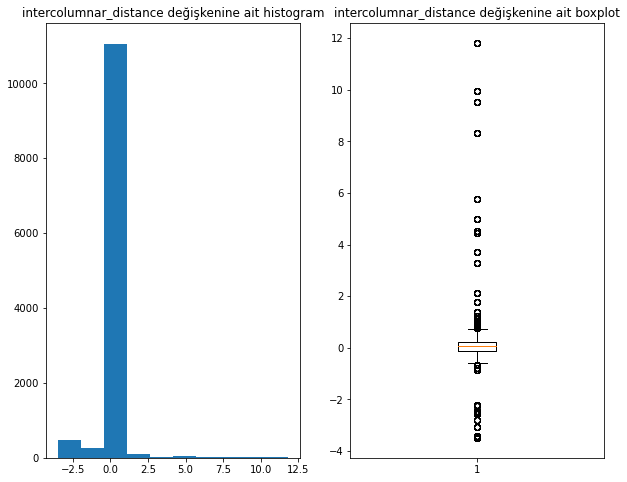

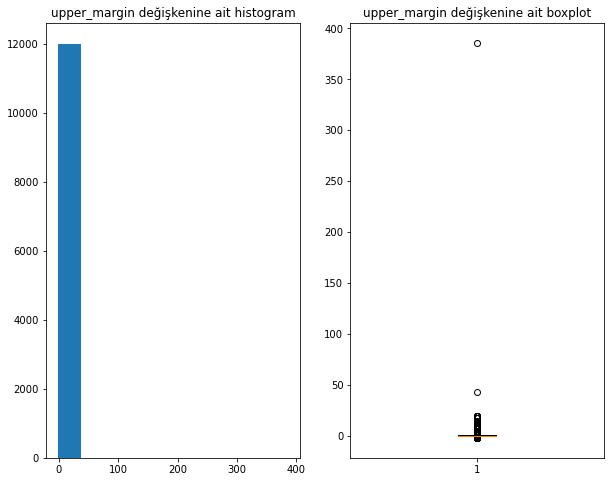

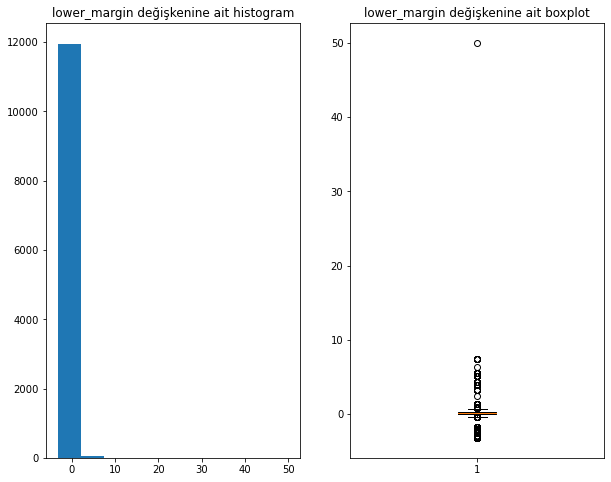

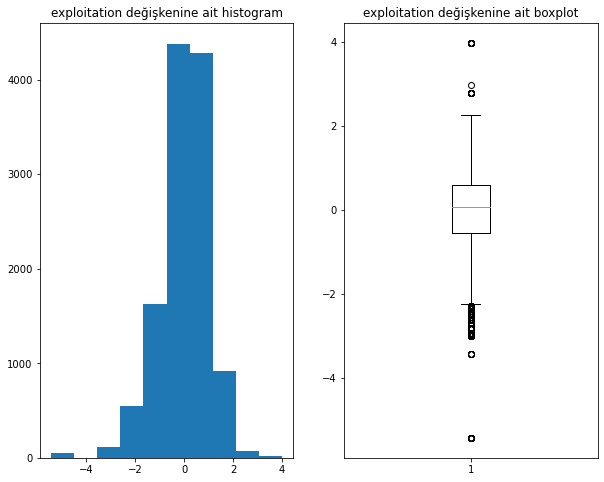

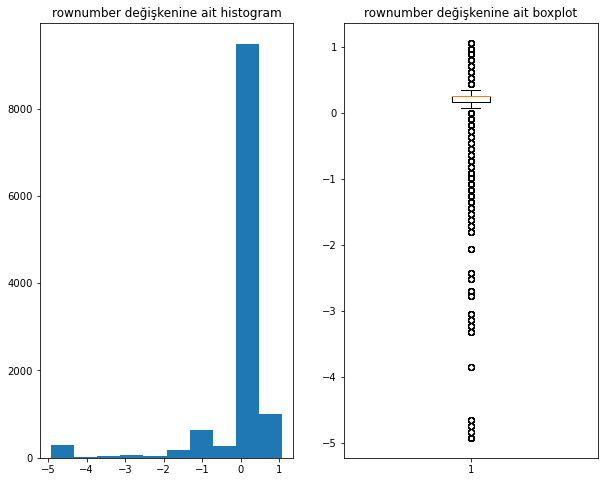

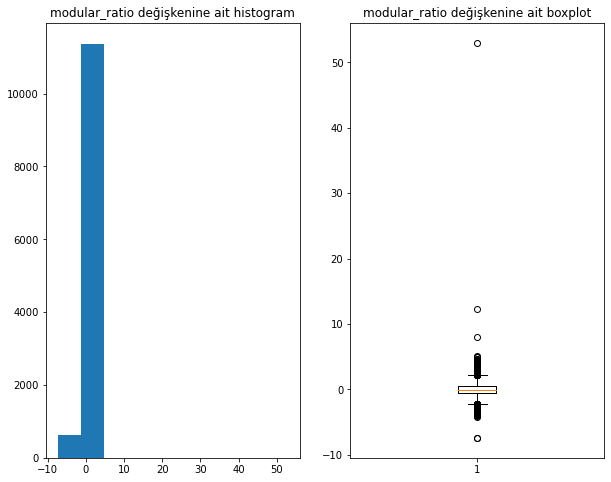

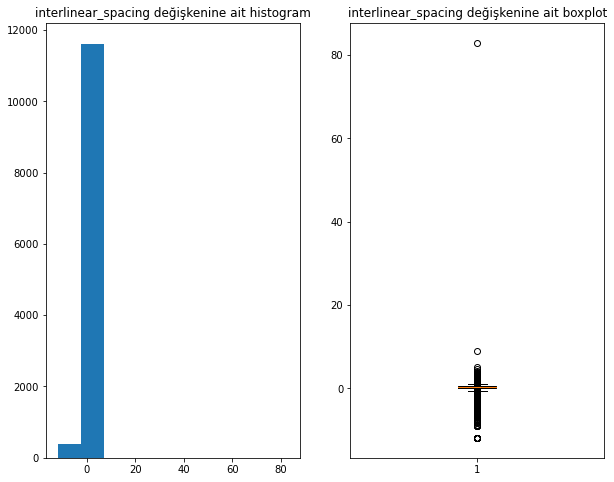

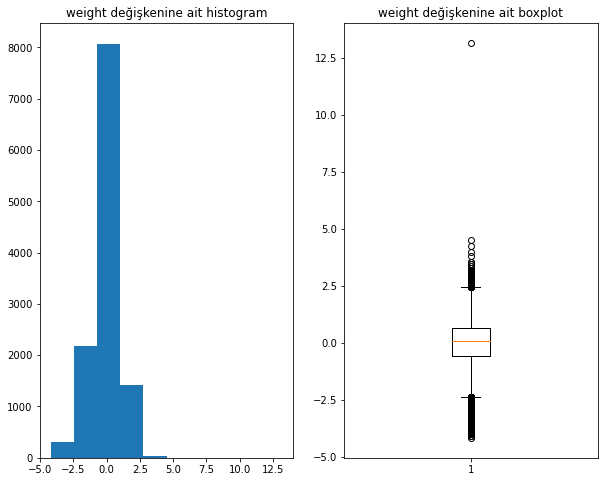

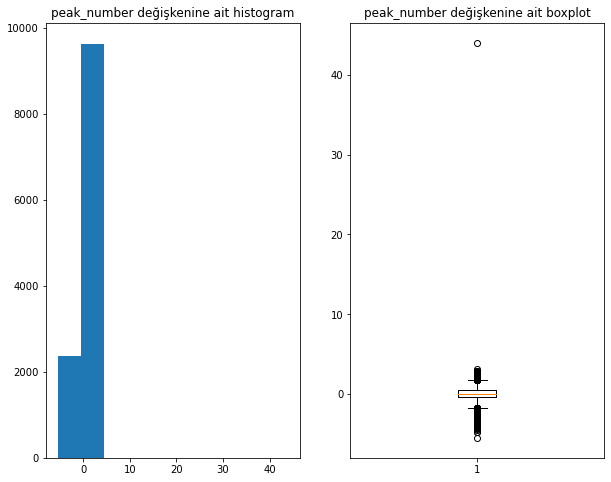

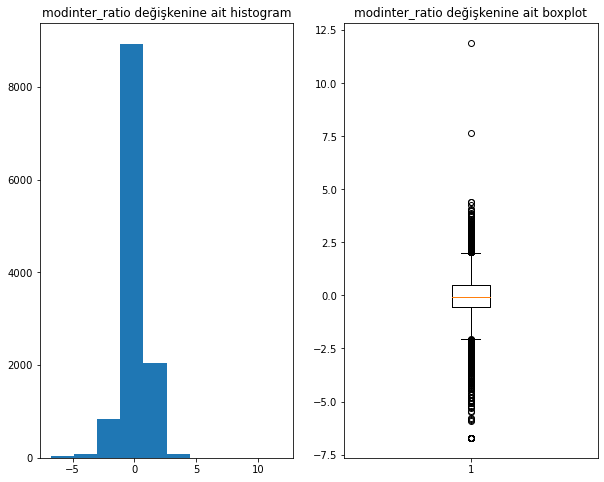

In [11]:
for i in col:
    f = plt.figure(figsize=(10,8))
    ax = f.add_subplot(121)
    plt.hist(new_data[i])
    plt.title(f"{i} değişkenine ait histogram")
    ax1 = f.add_subplot(122)
    plt.boxplot(new_data[i])
    plt.title(f"{i} değişkenine ait boxplot")
    

In [12]:
## upper margin, lower margin, modular ratio, interlinear spacing ve peak number anormal değerler içermektedir. 
## belirtilen değişkenleri sahip oldukları aykırı değerler ile modele sokmak model başarısını düşürür

In [13]:
for i in col:
    q1 = new_data[i].quantile(0.25)
    q3 = new_data[i].quantile(0.75)
    iqr = q3-q1
    
    alt_sınır = q1 - (iqr*1.5)
    üst_sınır = q3 + (iqr*1.5)
    
    aykırı = new_data[new_data[i].between(alt_sınır, üst_sınır, inclusive=True)][i]
    aykırı_hesap = new_data[i].count() - aykırı.count()
    print(f"{i} Niteliğine Ait ")
    print(f"Aykırı Değer Sayısı: {aykırı_hesap}")        
    

intercolumnar_distance Niteliğine Ait 
Aykırı Değer Sayısı: 1081
upper_margin Niteliğine Ait 
Aykırı Değer Sayısı: 555
lower_margin Niteliğine Ait 
Aykırı Değer Sayısı: 1046
exploitation Niteliğine Ait 
Aykırı Değer Sayısı: 309
rownumber Niteliğine Ait 
Aykırı Değer Sayısı: 2840
modular_ratio Niteliğine Ait 
Aykırı Değer Sayısı: 435
interlinear_spacing Niteliğine Ait 
Aykırı Değer Sayısı: 1643
weight Niteliğine Ait 
Aykırı Değer Sayısı: 387
peak_number Niteliğine Ait 
Aykırı Değer Sayısı: 1182
modinter_ratio Niteliğine Ait 
Aykırı Değer Sayısı: 521


C:\Users\Seher\AppData\Local\Temp/ipykernel_10220/3134193109.py:9: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  aykırı = new_data[new_data[i].between(alt_sınır, üst_sınır, inclusive=True)][i]


In [14]:
for i in col:
    q1 = new_data[i].quantile(0.25)
    q3 = new_data[i].quantile(0.75)
    iqr = q3-q1
    
    alt_sınır = q1 - (iqr*1.5)
    üst_sınır = q3 + (iqr*1.5)
    
    new_data[new_data[[i]] < alt_sınır] = alt_sınır
    new_data[new_data[[i]] > üst_sınır] = üst_sınır

In [15]:
## Alternatif
for i in col:
    q1 = new_data[i].quantile(0.25)
    q3 = new_data[i].quantile(0.75)
    iqr = q3-q1
    
    alt_sınır = q1 - (iqr*1.5)
    üst_sınır = q3 + (iqr*1.5)
    
    alt_aykırı = new_data[new_data[[i]] < alt_sınır] 
    üst_aykırı = new_data[new_data[[i]] > üst_sınır]
    aykırı = (alt_aykırı) | (üst_aykırı)


In [16]:
new_data[aykırı].count()

intercolumnar_distance    0
upper_margin              0
lower_margin              0
exploitation              0
rownumber                 0
modular_ratio             0
interlinear_spacing       0
weight                    0
peak_number               0
modinter_ratio            0
dtype: int64

In [17]:
## sınırları alt sınırı -3 üst sınırı 3 olarak kabul ederek de aykırı veri problemini çözebiliriz
## ancak öncelikle veriler standart normal dağılıma dönüştürülmelidir. 

In [18]:
for i in col:
    skewness = new_data[i].skew()
    kurtosis = new_data[i].kurt()
    
    if -3 < skewness and kurtosis < 3:
        print(f"{skewness} ve {kurtosis} değerlerinden dolayı {i} normal dağılım gösterir")
    else:
        print(f"{skewness} ve {kurtosis} değerlerinden dolayı {i} normal dağılım göstermez")

0.048999069795883636 ve 0.25555452639022125 değerlerinden dolayı intercolumnar_distance normal dağılım gösterir
-0.09484583381653029 ve 0.466415558171811 değerlerinden dolayı upper_margin normal dağılım gösterir
-0.6632374867908671 ve 0.5116446023941945 değerlerinden dolayı lower_margin normal dağılım gösterir
-0.36605585853643363 ve 0.10680797693733801 değerlerinden dolayı exploitation normal dağılım gösterir
-0.37205731069714415 ve -0.4210633341322496 değerlerinden dolayı rownumber normal dağılım gösterir
0.20886138677185848 ve 0.0699486627039616 değerlerinden dolayı modular_ratio normal dağılım gösterir
-0.42986008500593226 ve -0.06676490160104276 değerlerinden dolayı interlinear_spacing normal dağılım gösterir
-0.38913165904164765 ve 0.12826934024676007 değerlerinden dolayı weight normal dağılım gösterir
-0.10326302202076619 ve 0.09091404317606955 değerlerinden dolayı peak_number normal dağılım gösterir
0.07779989367563354 ve 0.18849357089296515 değerlerinden dolayı modinter_ratio 

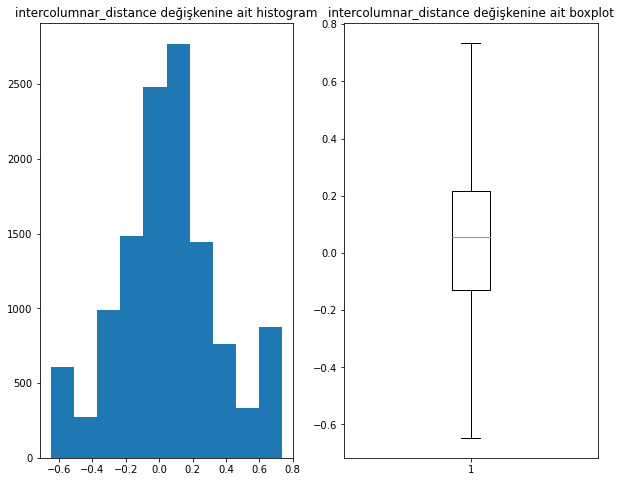

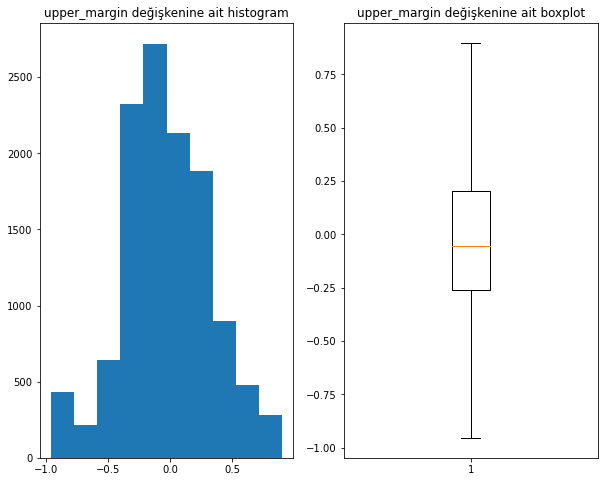

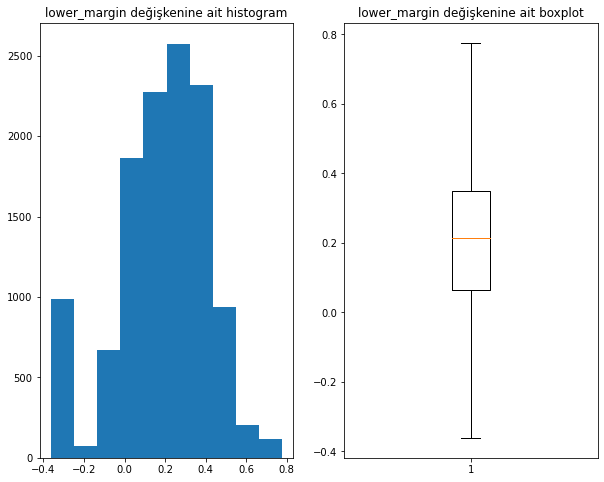

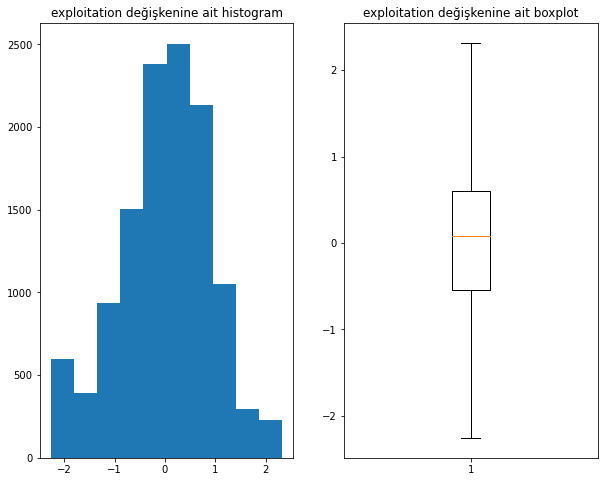

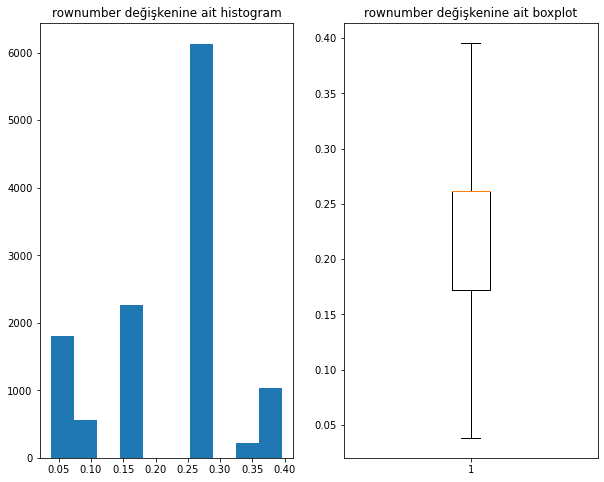

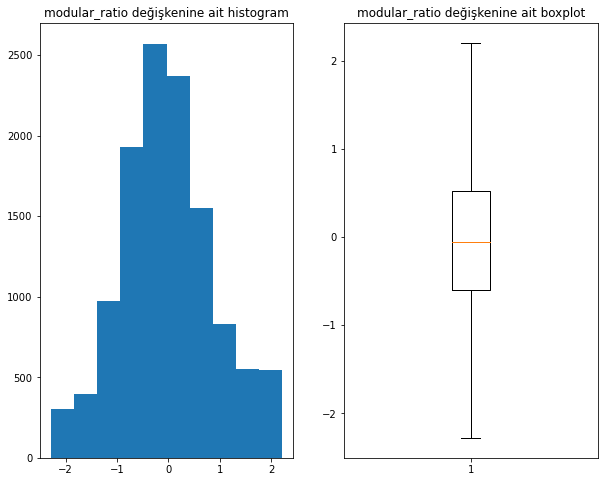

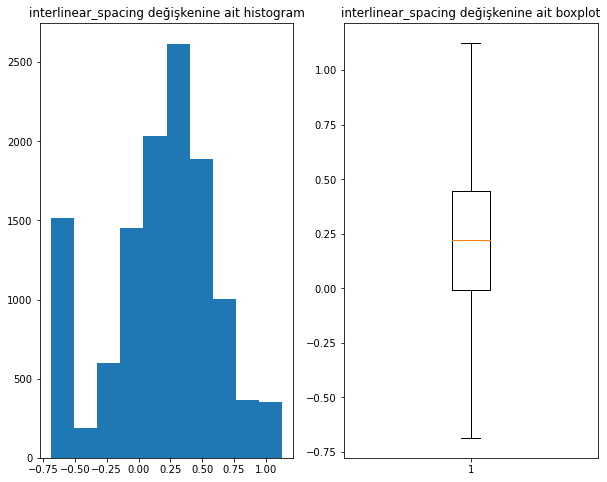

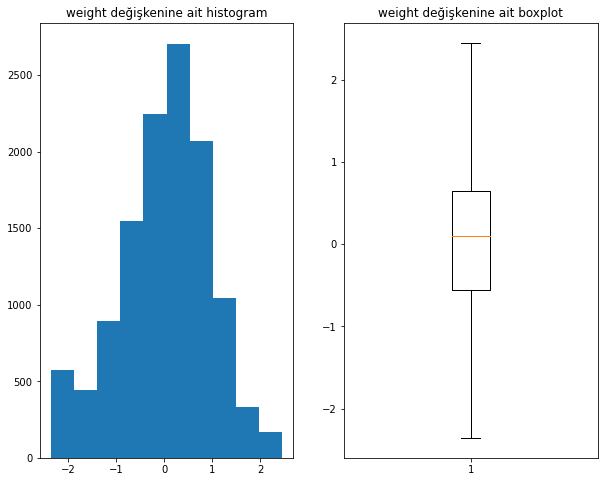

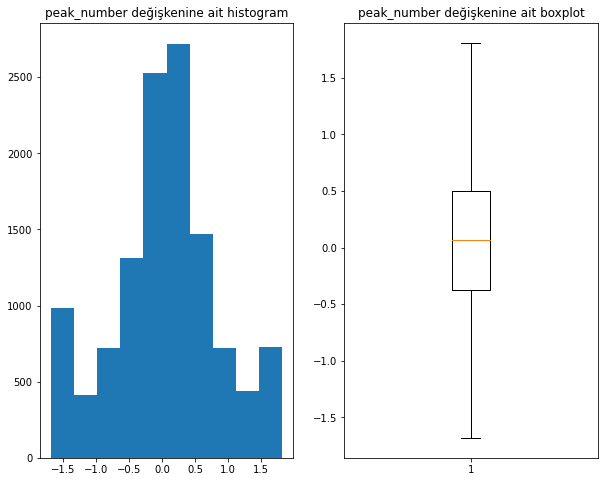

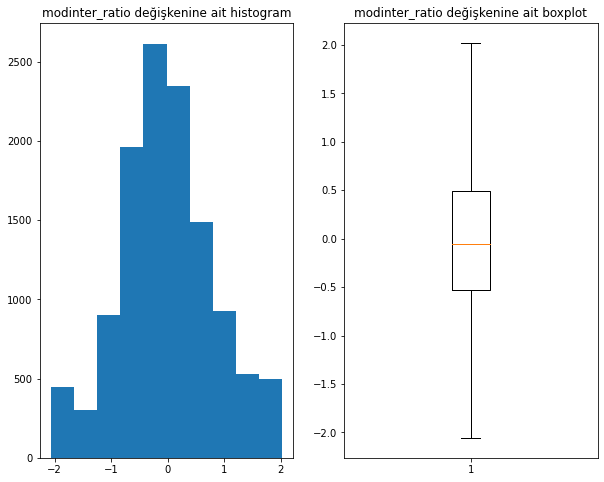

In [19]:
for i in col:
    f = plt.figure(figsize=(10,8))
    ax = f.add_subplot(121)
    plt.hist(new_data[i])
    plt.title(f"{i} değişkenine ait histogram")
    ax1 = f.add_subplot(122)
    plt.boxplot(new_data[i])
    plt.title(f"{i} değişkenine ait boxplot")

## Eksik Gözlem

In [20]:
## Veri setinde eksik gözlem bulunmamaktadır
train_dataset.isna().sum()

no                        0
intercolumnar_distance    0
upper_margin              0
lower_margin              0
exploitation              0
rownumber                 0
modular_ratio             0
interlinear_spacing       0
weight                    0
peak_number               0
modinter_ratio            0
category                  0
dtype: int64

## Niteliklerin Dağılımı

In [21]:
## Kategorideki sınıfların dağılımları dengeli değildir. 
## Bu noktada sınıflar birleştirilmeli, veya smote kullanılmalıdır. train_dataset["category"].value_counts()

In [22]:
train_dataset["category"].value_counts()

Marcus           5107
Clarius          2362
Philippus        1360
Coronavirucus    1009
Mongucus          640
Paithonius        600
Ubuntius          512
Esequlius         427
Name: category, dtype: int64

In [23]:
pie_data = {"value" : (5107, 2362, 1360, 1009, 640, 600, 512, 427),
            "Category" : ("Marcus", "Clarius", "Philippus", "Coronavirucus", "Mongucus", "Paithonius", "Ubuntius", "Esenqulius")}
pie_df = pd.DataFrame(pie_data)

In [24]:
pie_df

value       Category
0   5107         Marcus
1   2362        Clarius
2   1360      Philippus
3   1009  Coronavirucus
4    640       Mongucus
5    600     Paithonius
6    512       Ubuntius
7    427     Esenqulius

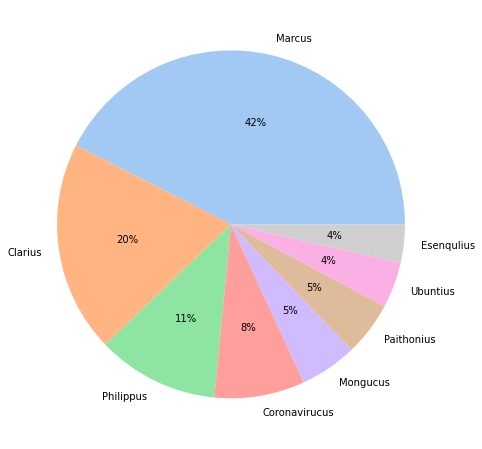

In [25]:
plt.figure(figsize=(10,8))
colour = sns.color_palette("pastel")[0:8]
plt.pie(data= pie_df, x=pie_df["value"], labels=pie_df["Category"], colors=colour, autopct='%.0f%%')
plt.show()

<AxesSubplot:xlabel='category', ylabel='count'>

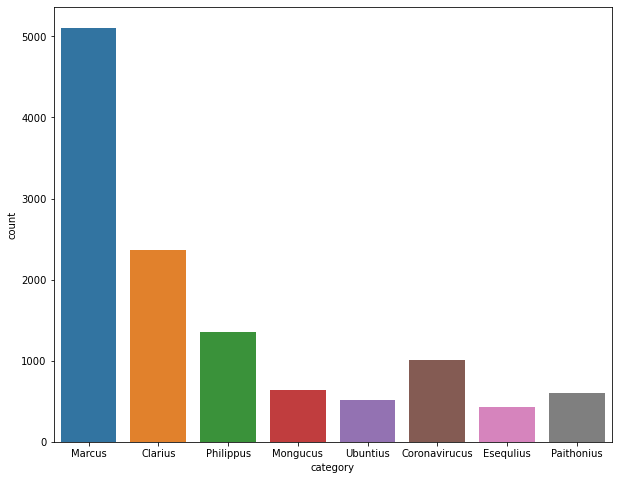

In [26]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x=train_dataset["category"], ax=ax)

In [27]:
train_dataset.groupby("category").describe()

no                                                   \
                count         mean          std   min      25%     50%   
category                                                                 
Clarius        2362.0  6005.875106  3423.629287   1.0  3050.50  6011.5   
Coronavirucus  1009.0  5849.094153  3473.227484  15.0  2757.00  5818.0   
Esequlius       427.0  5778.908665  3522.672808  17.0  2690.50  5599.0   
Marcus         5107.0  6031.195810  3493.568697   0.0  2997.50  6065.0   
Mongucus        640.0  6020.453125  3562.046824   5.0  3030.50  6173.5   
Paithonius      600.0  5906.773333  3350.057743  37.0  3043.50  5780.0   
Philippus      1360.0  6024.488235  3470.908432   2.0  3010.25  5969.0   
Ubuntius        512.0  6349.910156  3384.814496   9.0  3663.00  6513.0   

                                intercolumnar_distance            ...  \
                   75%      max                  count      mean  ...   
category                                                          ...   
Clarius        8914.00  12005.0                 2362.0  0.082390  ...   
Coronavirucus  8791.00  12016.0                 1009.0  0.620547  ...   
Esequlius      8758.50  11999.0                  427.0 -0.230397  ...   
Marcus         9114.00  12015.0                 5107.0 -0.007527  ...   
Mongucus       9098.00  11977.0                  640.0 -0.347781  ...   
Paithonius     8665.75  12002.0                  600.0  0.197134  ...   
Philippus      9114.25  12013.0                 1360.0 -0.255354  ...   
Ubuntius       9264.75  11997.0                  512.0  0.045669  ...   

              peak_number            modinter_ratio                      \
                      75%        max          count      mean       std   
category                                                                  
Clarius          0.095265   1.404887         2362.0 -0.162953  0.840733   
Coronavirucus    1.529613   2.839235         1009.0  0.004806  1.021314   
Esequlius        0.344717   2.059698          427.0  0.110361  1.241325   
Marcus           0.219991  44.000000         5107.0  0.058474  1.005983   
Mongucus         2.090879   3.119868          640.0  0.649444  1.010579   
Paithonius       0.781258   2.340331          600.0 -0.581493  0.859381   
Philippus        0.843621   2.558602         1360.0 -0.170001  0.877876   
Ubuntius         0.508420   1.529613          512.0 -0.244168  0.852693   

                                                                  
                    min       25%       50%       75%        max  
category                                                          
Clarius       -6.719324 -0.561717 -0.215738  0.237442   3.412929  
Coronavirucus -6.719324 -0.478829 -0.013116  0.548015  11.911338  
Esequlius     -6.719324 -0.560455  0.024690  0.649320   4.281308  
Marcus        -6.719324 -0.362594  0.064677  0.567683   7.654104  
Mongucus      -6.719324 -0.013378  0.789895  1.327696   4.382016  
Paithonius    -5.212433 -1.083397 -0.618693 -0.059163   2.166465  
Philippus     -6.719324 -0.745724 -0.206558  0.367950   3.353787  
Ubuntius      -6.719324 -0.770178 -0.411405  0.179908   3.790278  

[8 rows x 88 columns]

In [28]:
yüksek_kategori = train_dataset["category"].value_counts().nlargest(4).index

In [29]:
yüksek_kategori

Index(['Marcus', 'Clarius', 'Philippus', 'Coronavirucus'], dtype='object')

In [30]:
train_dataset["category"].where(train_dataset["category"].isin(yüksek_kategori), "other")

0               Marcus
1              Clarius
2            Philippus
3            Philippus
4            Philippus
             ...      
12012           Marcus
12013        Philippus
12014           Marcus
12015           Marcus
12016    Coronavirucus
Name: category, Length: 12017, dtype: object

In [31]:
train_dataset["new_category"] = train_dataset["category"].where(train_dataset["category"].isin(yüksek_kategori), "other")

In [32]:
train_dataset["new_category"].value_counts()

Marcus           5107
Clarius          2362
other            2179
Philippus        1360
Coronavirucus    1009
Name: new_category, dtype: int64

In [33]:
## Kategorik Veri Dönüşümü
def encode (x):
    
    if x == "Marcus":
        return 0
    elif x == "Clarius":
        return 1    
    elif x == "Philippus":
        return 2 
    elif x == "Coronavirucus":
        return 3
    elif x == "other":
        return 4

train_dataset["new_category_encode"] = train_dataset.apply(lambda x: encode(x["new_category"]), axis = 1)


In [34]:
train_dataset.head()

no  intercolumnar_distance  upper_margin  lower_margin  exploitation  \
0   0                0.241386      0.109171     -0.127126      0.380626   
1   1                0.303106      0.352558      0.082701      0.703981   
2   2               -0.116585      0.281897      0.175168     -0.152490   
3   3               -0.326430     -0.652394      0.384996     -1.694222   
4   4               -0.437525     -0.471816      0.463236     -0.545248   

   rownumber  modular_ratio  interlinear_spacing    weight  peak_number  \
0   0.172340       0.314889             0.484429  0.316412     0.188810   
1   0.261718      -0.391033             0.408929  1.045014     0.282354   
2   0.261718      -0.889332             0.371178 -0.024328     0.905984   
3  -0.185173      -1.138481            -0.232828 -1.747116    -1.183175   
4   0.261718      -0.972381             0.824183 -3.108388    -2.991700   

   modinter_ratio   category new_category  new_category_encode  
0        0.134922     Marcus       Marcus                    0  
1       -0.448209    Clarius      Clarius                    1  
2       -0.877830  Philippus    Philippus                    2  
3       -0.807380  Philippus    Philippus                    2  
4       -1.141030  Philippus    Philippus                    2

## Anova

In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from scipy.stats import levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison  

In [36]:
nitelikler=new_data.columns

In [37]:
## upper margin için eşit varyans hipotezi gerçerlidir. one way anova testine devam edilebilir. 
for i in nitelikler:
    a=levene(train_dataset[train_dataset.new_category == "Marcus"][i],
            train_dataset[train_dataset.new_category == "Clarius"][i],
            train_dataset[train_dataset.new_category == "Philippus"][i],
            train_dataset[train_dataset.new_category == "Coronavirucus"][i],
            train_dataset[train_dataset.new_category == "other"][i],
             center = "mean")
    print(f"{i} niteliğine ilişkin homojenlik testi sonucu")
    print(a)
    print("---------------")

intercolumnar_distance niteliğine ilişkin homojenlik testi sonucu
LeveneResult(statistic=24.542088019350913, pvalue=2.9233769875571607e-20)
---------------
upper_margin niteliğine ilişkin homojenlik testi sonucu
LeveneResult(statistic=1.8669180603063142, pvalue=0.11321911730229922)
---------------
lower_margin niteliğine ilişkin homojenlik testi sonucu
LeveneResult(statistic=36.43350464359157, pvalue=2.5584367338875226e-30)
---------------
exploitation niteliğine ilişkin homojenlik testi sonucu
LeveneResult(statistic=50.48178929048445, pvalue=3.2947645283279644e-42)
---------------
rownumber niteliğine ilişkin homojenlik testi sonucu
LeveneResult(statistic=120.81897765555185, pvalue=3.033586348563475e-101)
---------------
modular_ratio niteliğine ilişkin homojenlik testi sonucu
LeveneResult(statistic=36.58248863364545, pvalue=1.91359582498005e-30)
---------------
interlinear_spacing niteliğine ilişkin homojenlik testi sonucu
LeveneResult(statistic=5.31918636853783, pvalue=0.00028124850

In [38]:
for i in new_data.columns:
    varyans =train_dataset.groupby("new_category").agg([np.var]),i
    print(varyans)

(                         no intercolumnar_distance upper_margin lower_margin  \
                        var                    var          var          var   
new_category                                                                   
Clarius        1.172124e+07               0.538566     0.778023     0.554455   
Coronavirucus  1.206331e+07               2.113354     0.295553     1.117213   
Marcus         1.220502e+07               1.012612    30.752407     1.688258   
Philippus      1.204721e+07               0.974558     0.726264     0.586856   
other          1.196480e+07               0.791752     0.349483     0.864675   

              exploitation rownumber modular_ratio interlinear_spacing  \
                       var       var           var                 var   
new_category                                                             
Clarius           0.684123  0.410410      0.674695            0.726709   
Coronavirucus     1.375472  1.137451      0.813410            

In [39]:
# p<0.05
modell = ols('intercolumnar_distance ~ C(new_category)', data=train_dataset).fit()
anova = sm.stats.anova_lm(modell, typ=2)
print(anova)

                       sum_sq       df          F         PR(>F)
C(new_category)    502.858126      4.0  129.94352  8.023132e-109
Residual         11621.071666  12012.0        NaN            NaN


In [35]:
from scipy.stats import f_oneway
anova_df = train_dataset.drop(["category","new_category","no","new_category_encode"], axis=1)
for i in anova_df:
    anova_test = f_oneway(anova_df[i], train_dataset["new_category_encode"])
    print(f"{i} niteliğine ait anova test sonucu")
    print(anova_test)
    print("----------------")

intercolumnar_distance niteliğine ait anova test sonucu
F_onewayResult(statistic=6809.458112746474, pvalue=0.0)
----------------
upper_margin niteliğine ait anova test sonucu
F_onewayResult(statistic=1430.8964705417143, pvalue=3.3100462901610778e-304)
----------------
lower_margin niteliğine ait anova test sonucu
F_onewayResult(statistic=6741.963911080804, pvalue=0.0)
----------------
exploitation niteliğine ait anova test sonucu
F_onewayResult(statistic=7255.514295851049, pvalue=0.0)
----------------
rownumber niteliğine ait anova test sonucu
F_onewayResult(statistic=7123.734732128741, pvalue=0.0)
----------------
modular_ratio niteliğine ait anova test sonucu
F_onewayResult(statistic=6602.892161878831, pvalue=0.0)
----------------
interlinear_spacing niteliğine ait anova test sonucu
F_onewayResult(statistic=5767.662387049269, pvalue=0.0)
----------------
weight niteliğine ait anova test sonucu
F_onewayResult(statistic=7052.71733733158, pvalue=0.0)
----------------
peak_number niteliğ

In [38]:
for i in new_data.columns:
    multicomp = MultiComparison(train_dataset[i], train_dataset["new_category"])
    tukey = multicomp.tukeyhsd(alpha=0.05)
    print(f"{i} niteliğine ait post hoc sonuçları")
    print(tukey.summary())

intercolumnar_distance niteliğine ait post hoc sonuçları
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
      Clarius Coronavirucus   0.5382  0.001  0.4372  0.6391   True
      Clarius        Marcus  -0.0899 0.0022 -0.1567 -0.0231   True
      Clarius     Philippus  -0.3377  0.001 -0.4291 -0.2464   True
      Clarius         other  -0.1647  0.001 -0.2444  -0.085   True
Coronavirucus        Marcus  -0.6281  0.001 -0.7205 -0.5356   True
Coronavirucus     Philippus  -0.8759  0.001 -0.9874 -0.7644   True
Coronavirucus         other  -0.7028  0.001  -0.805 -0.6006   True
       Marcus     Philippus  -0.2478  0.001 -0.3297 -0.1659   True
       Marcus         other  -0.0748 0.0248 -0.1434 -0.0061   True
    Philippus         other   0.1731  0.001  0.0803  0.2658   True
------------------------------------------------------------------
upper

## Korelasyon

<AxesSubplot:>

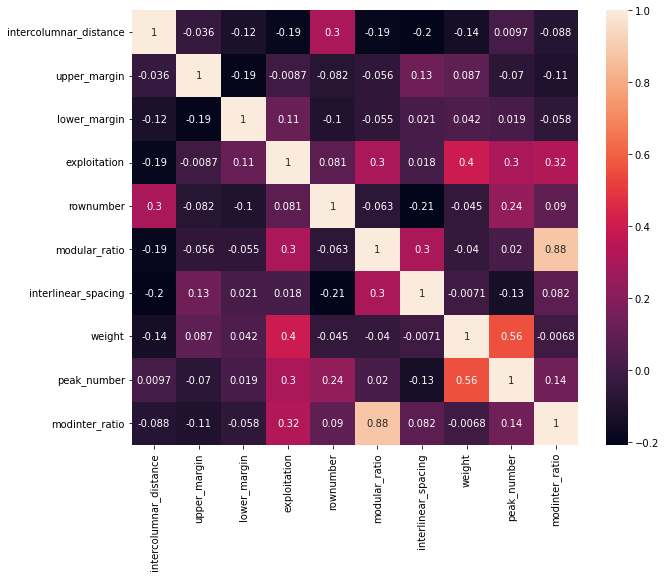

In [42]:
fig= plt.figure(figsize=(10,8))
cor = new_data.corr()
sns.heatmap(cor,annot=True)

<Figure size 720x576 with 0 Axes>

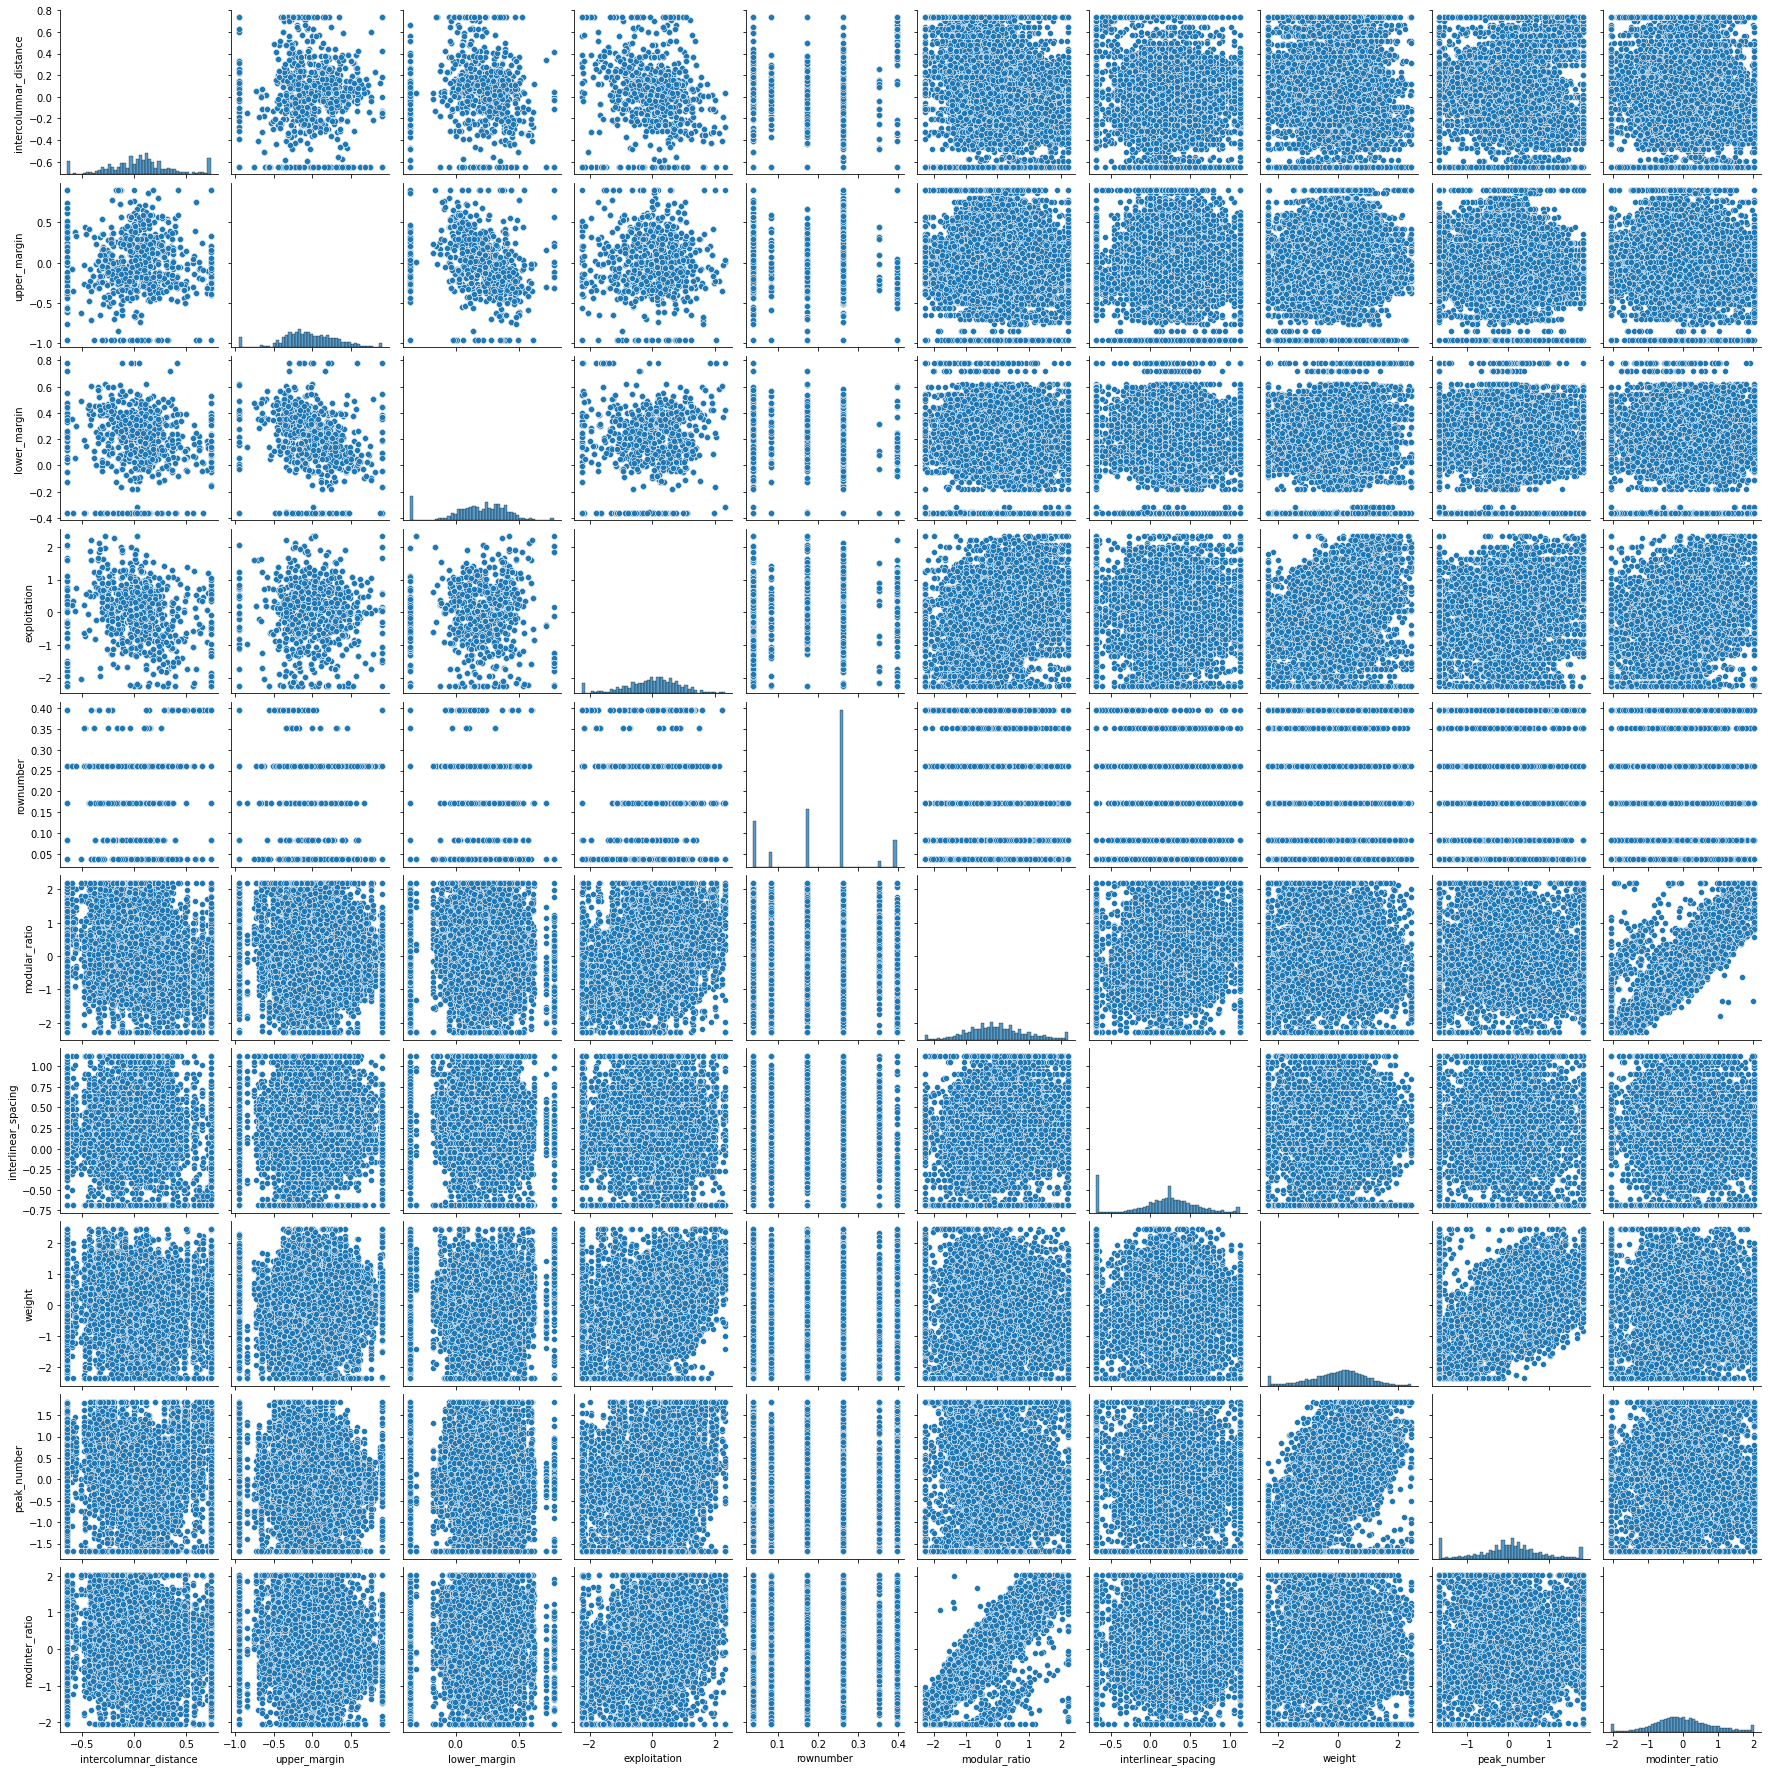

In [43]:
fig= plt.figure(figsize=(10,8))
sns.pairplot(new_data)
# modular ratio ile modinter_ratio arasında doğrusal bir ilişki var. %87 lik bir ilişki 

## Lojistik Regresyon

In [39]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from sklearn.model_selection import train_test_split

In [40]:
x = new_data
y = train_dataset["new_category"]
# kodlamamıza gerek yok :/

In [55]:
X = sm.add_constant(x)

C:\Users\Seher\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [47]:
model = sm.MNLogit(y_train, x_train).fit()
## stats model kütüphanesinde her durum için bir yol var o_O

Optimization terminated successfully.
         Current function value: 1.022884
         Iterations 8


In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:           new_category   No. Observations:                 9613
Model:                        MNLogit   Df Residuals:                     9573
Method:                           MLE   Df Model:                           36
Date:                Wed, 05 Oct 2022   Pseudo R-squ.:                  0.2922
Time:                        15:26:32   Log-Likelihood:                -9833.0
converged:                       True   LL-Null:                       -13893.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
new_category=Coronavirucus       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
intercolumnar_distance         3.0517      0.246     12.389      0.000       2.569       3.534
upper_margin                  -0.8258      0.184     -4.498      0.000      -1.186      -0.466
lower_margin                  -4.0963      0.277    -14.804      0.000      -4.639      -3.554
exploitation                   0.7998      0.084      9.489      0.000       0.635       0.965
rownumber                     -8.8500      0.427    -20.721      0.000      -9.687      -8.013
modular_ratio                 -2.0882      0.198    -10.556      0.000      -2.476      -1.701
interlinear_spacing           -3.2585      0.199    -16.365      0.000      -3.649      -2.868
weight                        -1.4397      0.098    -14.637      0.000      -1.632      -1.247
peak_number                    2.0931      0.114     18.352      0.000       1.870       2.317
modinter_ratio                 1.9006      0.195      9.737      0.000       1.518       2.283
----------------------------------------------------------------------------------------------
   new_category=Marcus       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercolumnar_distance     1.0985      0.120      9.156      0.000       0.863       1.334
upper_margin              -0.0469      0.086     -0.544      0.586      -0.216       0.122
lower_margin              -0.1058      0.126     -0.837      0.403      -0.354       0.142
exploitation               0.3085      0.038      8.219      0.000       0.235       0.382
rownumber                  1.1011      0.173      6.370      0.000       0.762       1.440
modular_ratio              0.9631      0.091     10.575      0.000       0.785       1.142
interlinear_spacing        0.5442      0.083      6.548      0.000       0.381       0.707
weight                     0.2626      0.040      6.574      0.000       0.184       0.341
peak_number               -0.5676      0.053    -10.635      0.000      -0.672      -0.463
modinter_ratio            -0.6441      0.095     -6.745      0.000      -0.831      -0.457
------------------------------------------------------------------------------------------
new_category=Philippus       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercolumnar_distance    -4.6198      0.167    -27.691      0.000      -4.947      -4.293
upper_margin               0.1167      0.119      0.980      0.327      -0.117       0.350
lower_margin               1.1507      0.168      6.832      0.000       0.821       1.481
exploitation               0.0358      0.055      0.647      0.517      -0.073       0.144
rownumber                 -5.6871      0.278    -20.464      0.000      -6.232      -5.142
modular_ratio             -0.0545      0.131     -0.415      0.678      -0.312       0.203
inte

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logistic= LogisticRegression(multi_class="multinomial", penalty="l2", C=1)


In [44]:
logistic_model = logistic.fit(x_train, y_train)

C:\Users\Seher\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Feature İmportance

In [45]:
logistic_model.coef_

array([[ 0.90441414,  0.03809436, -0.01136038, -0.18643764,  0.91933952,
         0.264341  ,  0.41554888,  0.64036258, -1.17967874, -0.13307555],
       [ 4.02989242, -1.3997489 , -3.22730492,  0.3295842 ,  4.34001365,
        -2.01712828, -2.9208138 , -0.70906468,  0.57710995,  1.72365736],
       [ 1.88701575, -0.07052451, -0.8532357 ,  0.22635228, -3.57307805,
         0.99105227,  0.69195312,  0.67833078, -1.37850835, -0.57509863],
       [-4.86102519,  0.2490788 ,  2.15422578, -0.28365122,  0.33832128,
         0.53275681,  1.0949294 , -0.1985643 ,  0.84071742, -0.82190131],
       [-1.96029711,  1.18310024,  1.93767521, -0.08584764, -2.0245964 ,
         0.2289782 ,  0.71838241, -0.41106438,  1.14035972, -0.19358186]])

In [46]:
train_dataset.new_category.value_counts()

Marcus           5107
Clarius          2362
other            2179
Philippus        1360
Coronavirucus    1009
Name: new_category, dtype: int64

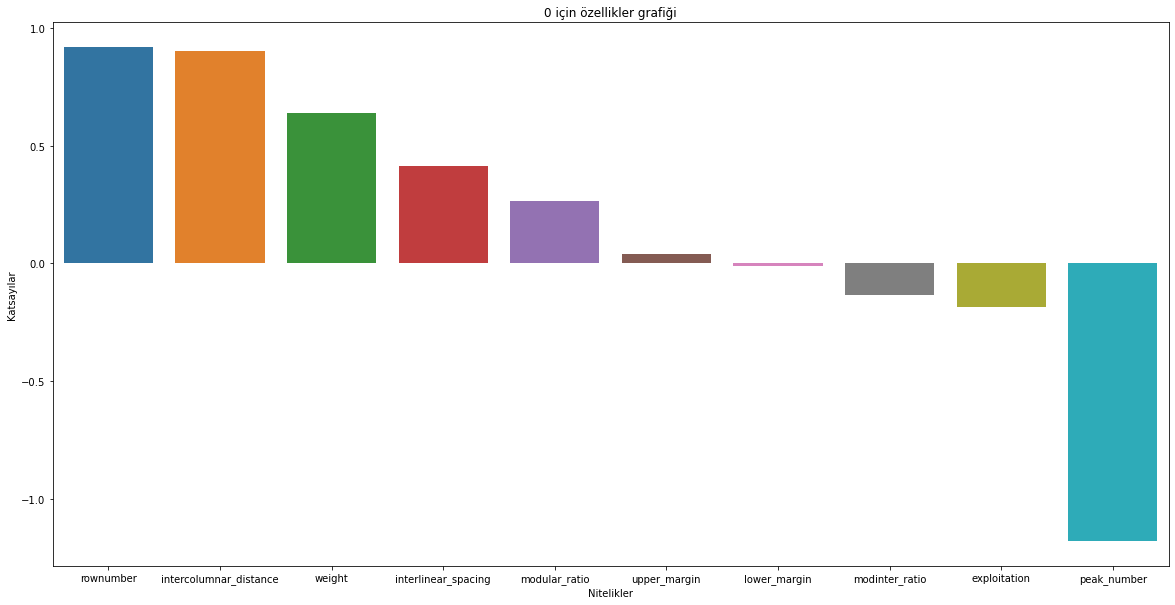

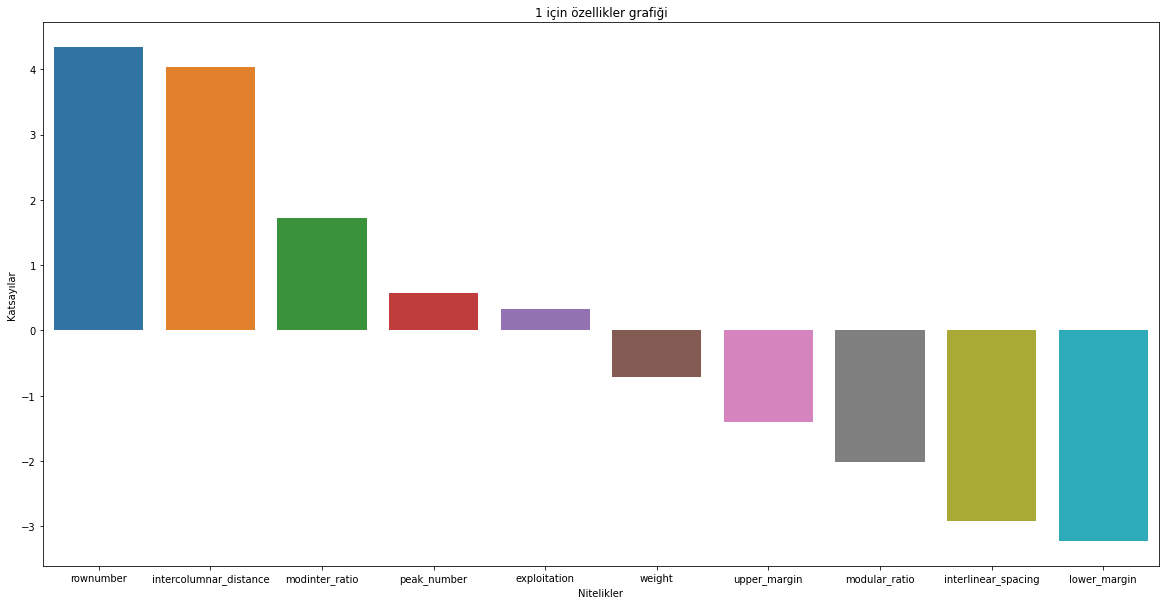

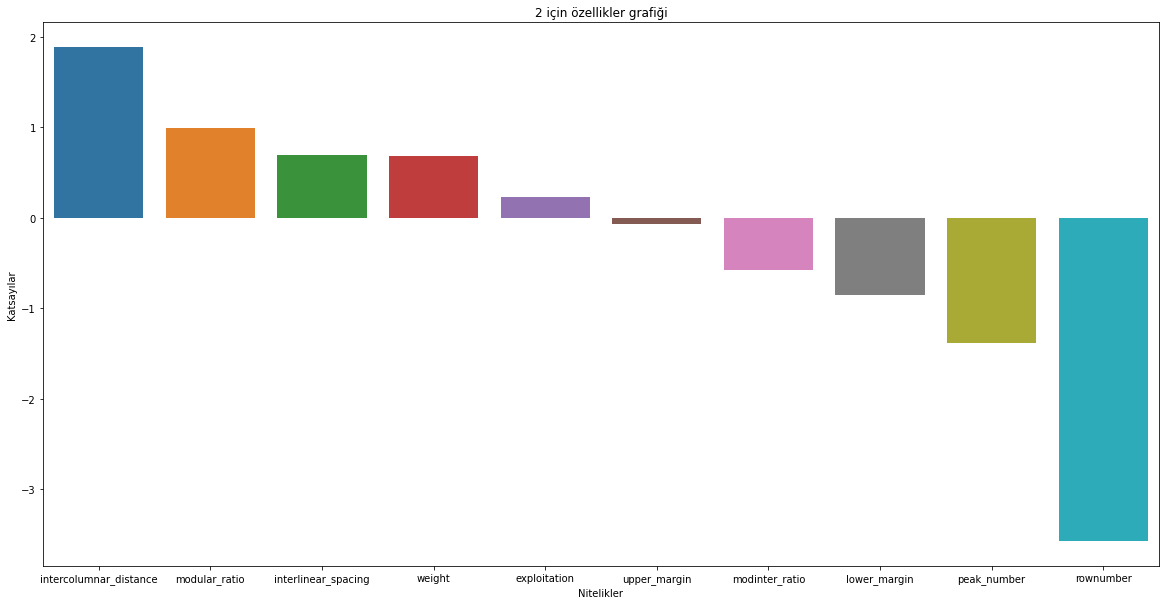

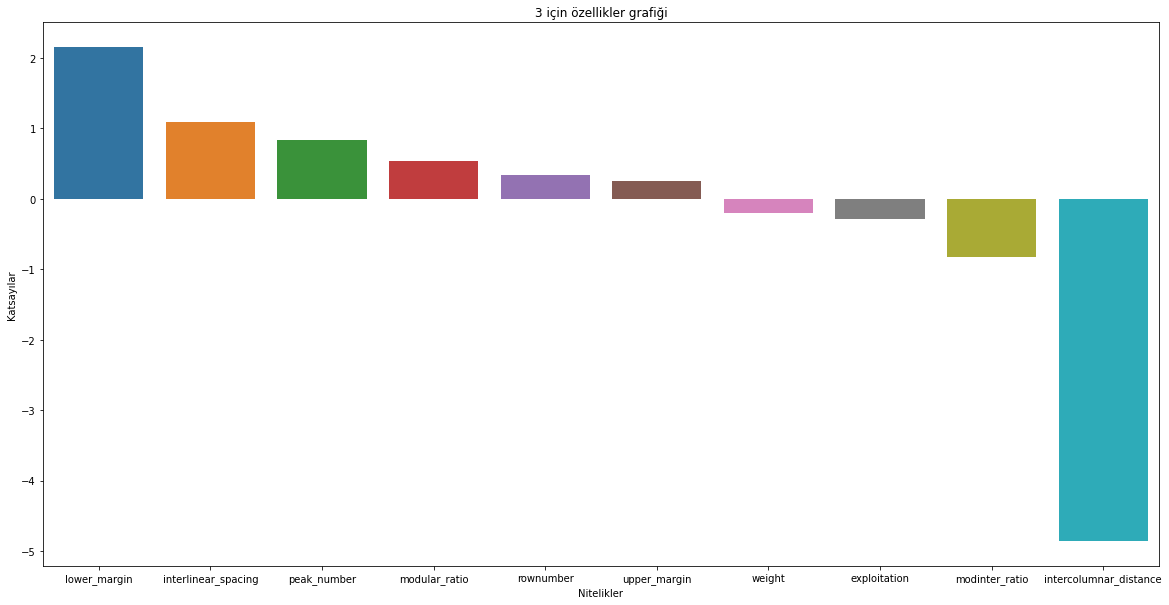

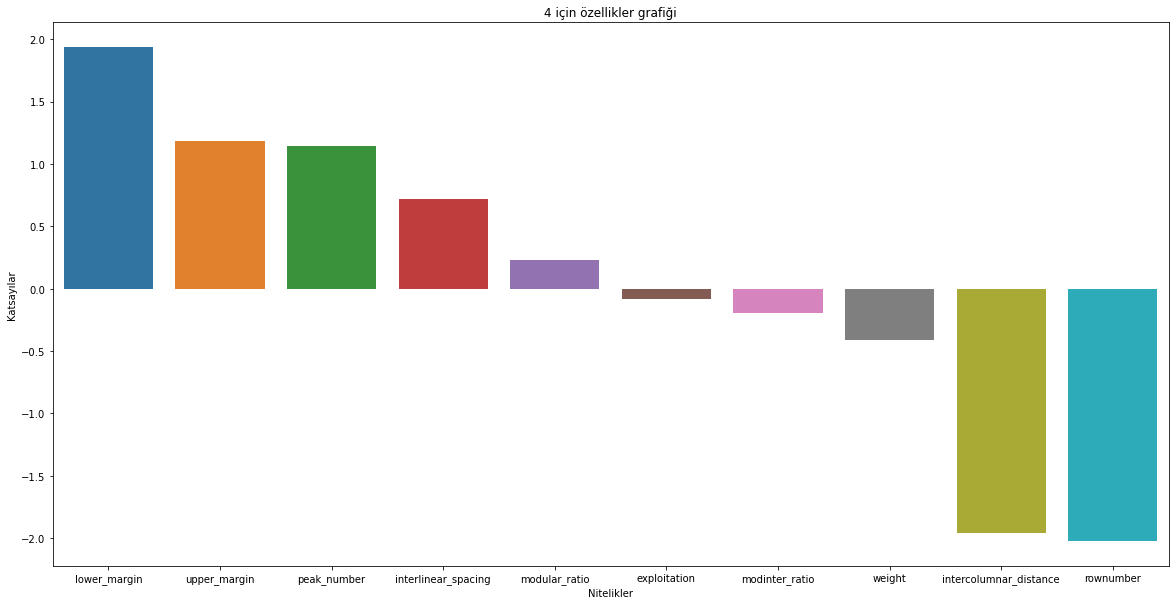

In [47]:
for i in np.arange(0,5):
    feature_importance = pd.DataFrame(data={"Nitelikler": x_train.columns,
                                     "Katsayılar": logistic_model.coef_[i]})
    feature_importance = feature_importance.sort_values(by="Katsayılar", ascending = False)
    
    fig, ax = plt.subplots(figsize=(20,10))

    sns.barplot(x=feature_importance["Nitelikler"], y=feature_importance["Katsayılar"], ax=ax)
    plt.title(f"{i} için özellikler grafiği")

In [50]:
logistik_pred = logistic_model.predict(x_test)
logistik_score=metrics.f1_score(y_test, logistik_pred, average="macro")

## Feature Selection

In [48]:
import sklearn.feature_selection as fs
import sklearn.metrics as metrics

[0.336313364952802]
[0.336313364952802, 0.39169588063326877]
[0.336313364952802, 0.39169588063326877, 0.384478565012066]
[0.336313364952802, 0.39169588063326877, 0.384478565012066, 0.47761064159603944]
[0.336313364952802, 0.39169588063326877, 0.384478565012066, 0.47761064159603944, 0.5097713150759573]


C:\Users\Seher\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.336313364952802, 0.39169588063326877, 0.384478565012066, 0.47761064159603944, 0.5097713150759573, 0.5162971443863219]
[0.336313364952802, 0.39169588063326877, 0.384478565012066, 0.47761064159603944, 0.5097713150759573, 0.5162971443863219, 0.5255082363170576]


C:\Users\Seher\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.336313364952802, 0.39169588063326877, 0.384478565012066, 0.47761064159603944, 0.5097713150759573, 0.5162971443863219, 0.5255082363170576, 0.5516140050440623]


C:\Users\Seher\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.336313364952802, 0.39169588063326877, 0.384478565012066, 0.47761064159603944, 0.5097713150759573, 0.5162971443863219, 0.5255082363170576, 0.5516140050440623, 0.5590835588476357]


C:\Users\Seher\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.336313364952802, 0.39169588063326877, 0.384478565012066, 0.47761064159603944, 0.5097713150759573, 0.5162971443863219, 0.5255082363170576, 0.5516140050440623, 0.5590835588476357, 0.5743793822155969]


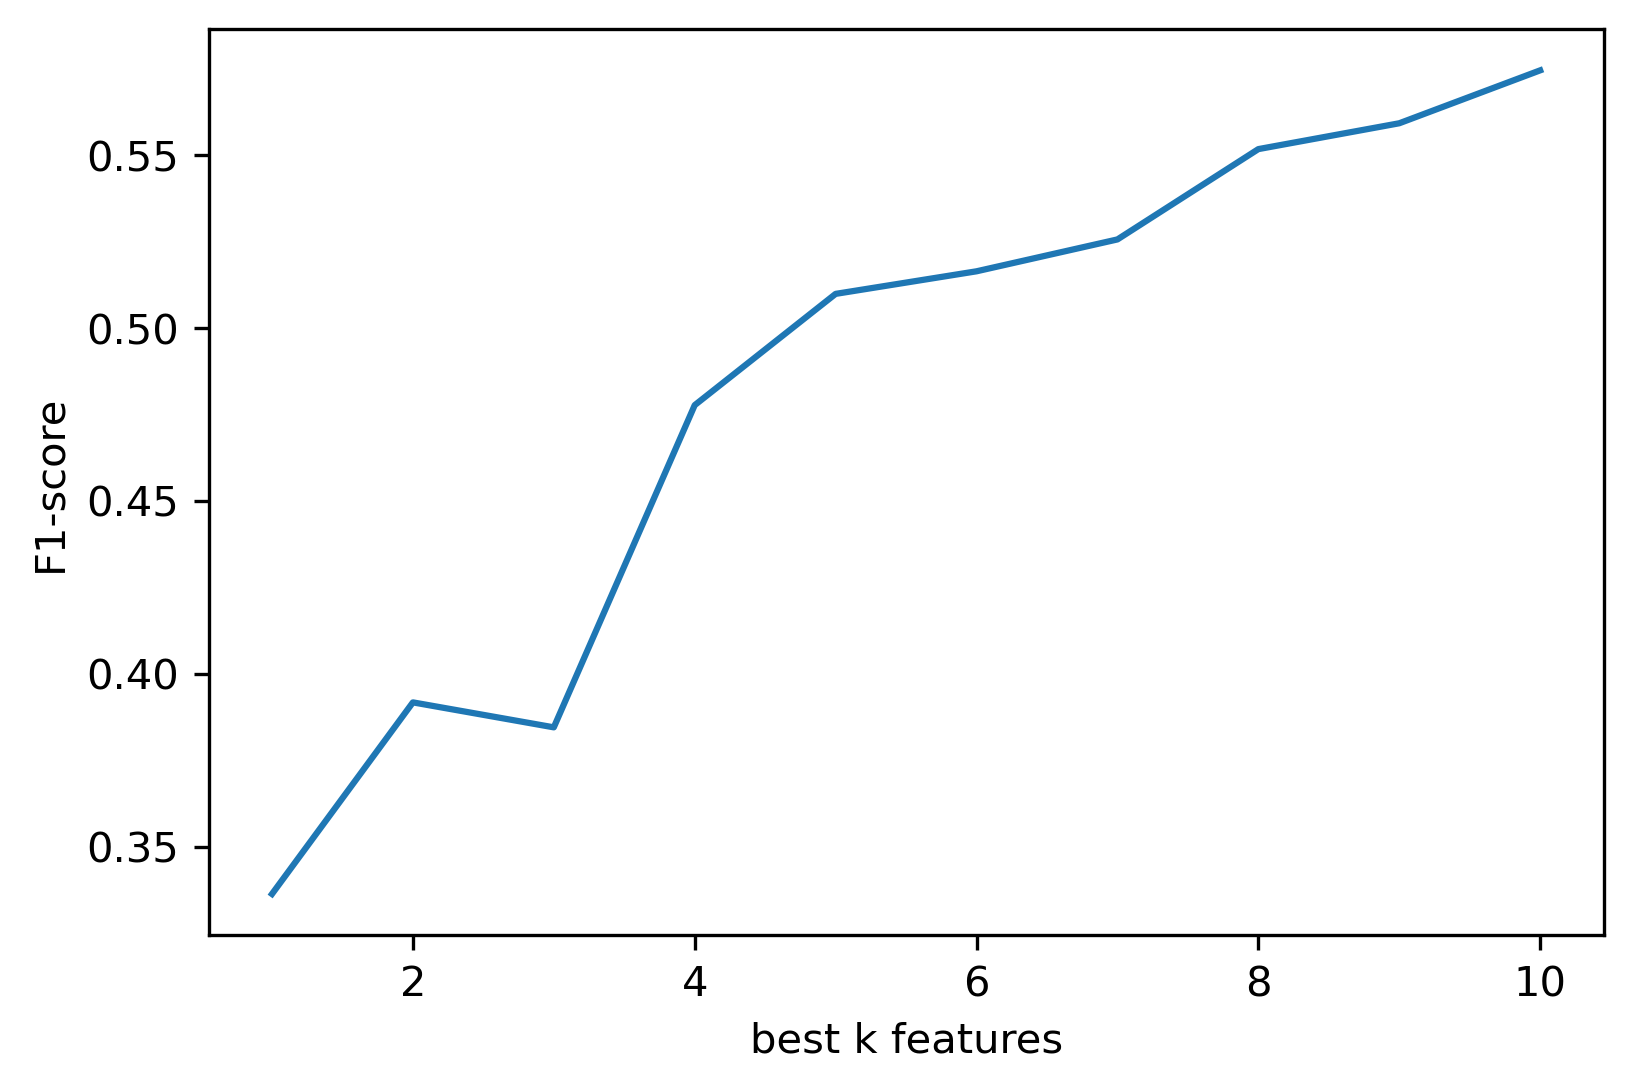

In [53]:
f1_list = []
aralık = np.arange(1,11)
for i in aralık:
    nitelik_seçimi = fs.SelectKBest(fs.f_classif, k=i)
    nitelik_seçimi.fit(x,y)
    x_trans= nitelik_seçimi.transform(x)
    train_x, test_x, train_y, test_y = train_test_split(x_trans,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=42)
    
    logistik_model2 = LogisticRegression(multi_class="multinomial", penalty="l2", C=1).fit(train_x, train_y)
    y_pred= logistik_model2.predict(test_x)
    f1 = metrics.f1_score(test_y, y_pred, average="macro")
    f1_list.append(f1)
    print(f1_list)
fig, axe = plt.subplots(dpi = 300)
axe.plot(aralık, f1_list)
axe.set_xlabel("best k features")
axe.set_ylabel("F1-score")
plt.show(fig)   

In [54]:
x.shape

(12017, 10)

In [55]:
x_trans.shape

(12017, 10)

In [62]:
## veya aşağıdaki yol da tercih edilebilir
# logistik_model2 = LogisticRegression(multi_class="multinomial", penalty="l2", C=1).fit(train_x, train_y)
# fs.SelectFromModel(logistik_model2, prefit=True)
# X_trans = model.transform(X)

# x.shape
# X_trans.shape

## Gradient Boosting

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
gb = GradientBoostingClassifier()
gb_model= gb.fit(x_train, y_train)

In [58]:
gb_pred = gb_model.predict(x_test)

In [59]:
gb_score=metrics.f1_score(y_test, gb_pred, average="macro")

In [60]:
gb_tuned = GradientBoostingClassifier(learning_rate=0.7, max_depth=4, n_estimators=300)
gb_tuned.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4, n_estimators=300)

In [61]:
gb_tuned_pred= gb_tuned.predict(x_test)

In [62]:
gb_tuned_score =metrics.f1_score(y_test, gb_tuned_pred, average="macro")

## Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
clf = RandomForestClassifier()
clf_model= clf.fit(x_train,y_train)

In [65]:
clf_pred = clf.predict(x_test)

In [66]:
rf_score=metrics.f1_score(y_test, clf_pred, average="macro")

In [67]:
metrics.confusion_matrix(y_test, clf_pred)

array([[ 454,    0,    9,    1,    1],
       [   0,  206,    1,    0,    0],
       [   6,    0, 1003,    0,    3],
       [   1,    0,    5,  284,    3],
       [   0,    0,    6,    3,  418]], dtype=int64)

In [75]:
fi = clf_model.feature_importances_

<AxesSubplot:>

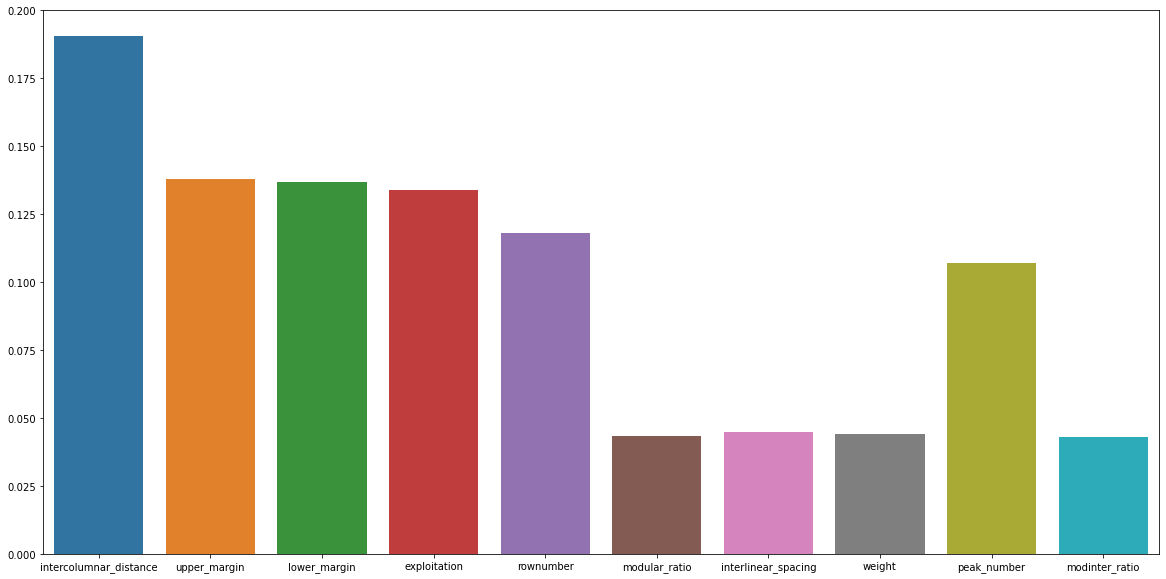

In [76]:
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(x=x_train.columns, y=fi)

## Selection Parameter With Halving GridSearch CV

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingGridSearchCV

## Gradient Boosting

In [37]:
# uzun öğrenme süresi
gbm_params = {"learning_rate":[0.1, 0.01, 0.001, 0.3, 0.5, 0.7, 0.9],
             "n_estimators":[100, 300, 500, 700, 900],
             "max_depth":[2,4,6,8,10]}

gbm_tune =  HalvingGridSearchCV(estimator=GradientBoostingClassifier(max_depth=8), param_grid=gbm_params, cv=3)
gbm_tune.fit(x_train,y_train)
## 
#09:10

HalvingGridSearchCV(cv=3, estimator=GradientBoostingClassifier(max_depth=8),
                    param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.3, 0.5,
                                                  0.7, 0.9],
                                'max_depth': [2, 4, 6, 8, 10],
                                'n_estimators': [100, 300, 500, 700, 900]},
                    refit=<function _refit_callable at 0x0000028C10850310>)

In [38]:
gbm_tune.best_estimator_

GradientBoostingClassifier(learning_rate=0.7, max_depth=4, n_estimators=300)

In [39]:
gbm_tune_pred = gbm_tune.predict(x_test)

In [40]:
metrics.f1_score(y_test, gbm_tune_pred, average="macro")

0.9987518595552384

In [ ]:
# GradientBoostingClassifier(learning_rate=0.5, max_depth=8) %99.87

## Random Forest

In [108]:
rf_param = {'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}

In [109]:
rf_tune = HalvingGridSearchCV(estimator=RandomForestClassifier(), param_grid=rf_param,n_jobs=-1, verbose=2, cv=3)
rf_tune.fit(x_train, y_train)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 118
max_resources_: 9613
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 144
n_resources: 118
Fitting 3 folds for each of 144 candidates, totalling 432 fits
----------
iter: 1
n_candidates: 48
n_resources: 354
Fitting 3 folds for each of 48 candidates, totalling 144 fits
----------
iter: 2
n_candidates: 16
n_resources: 1062
Fitting 3 folds for each of 16 candidates, totalling 48 fits
----------
iter: 3
n_candidates: 6
n_resources: 3186
Fitting 3 folds for each of 6 candidates, totalling 18 fits
----------
iter: 4
n_candidates: 2
n_resources: 9558
Fitting 3 folds for each of 2 candidates, totalling 6 fits


HalvingGridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                    param_grid={'bootstrap': [True],
                                'max_depth': [80, 90, 100, 110],
                                'min_samples_leaf': [3, 4, 5],
                                'min_samples_split': [8, 10, 12],
                                'n_estimators': [100, 200, 300, 1000]},
                    refit=<function _refit_callable at 0x000001D609377670>,
                    verbose=2)

In [120]:
rf_tune.best_estimator_

RandomForestClassifier(max_depth=100, min_samples_leaf=3, min_samples_split=8,
                       n_estimators=1000)

In [68]:
rf_tuned = RandomForestClassifier(bootstrap= True,
max_depth= 100,
min_samples_leaf= 3,
min_samples_split= 8,
n_estimators= 1000)
rf_tuned.fit(x_train,y_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=3, min_samples_split=8,
                       n_estimators=1000)

In [69]:
rf_tuned_pred = rf_tuned.predict(x_test)

In [70]:
rf_tuned_score=metrics.f1_score(y_test, rf_tuned_pred, average="macro")

In [71]:
rf_tuned_score

0.9699885370413689

## XGB Boost

In [59]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [72]:
from xgboost import XGBClassifier

In [73]:
y_yeni = train_dataset["new_category_encode"]

In [74]:
train_x, test_x, train_y, test_y = train_test_split(x, y_yeni, test_size=0.20, random_state=42)

In [75]:
xgb = XGBClassifier()
xgb_model = xgb.fit(train_x, train_y)

In [76]:
xgb_pred = xgb_model.predict(test_x)

In [77]:
xgb_score=metrics.f1_score(test_y, xgb_pred, average="macro")

In [67]:
xgb_params = {
        'n_estimators': [100, 300,500,800],
        'subsample': [0.4, 0.6, 0.8, 1.0], 
        'gamma' : [0,2,4,6], #default = 0
        'max_depth': [6, 8, 10], #default 6
        'learning_rate': [0.1,0.01,0.001,0.0001,0.2]} # eta, default = 0.3

In [68]:
xgb_tune = HalvingGridSearchCV(estimator=XGBClassifier(), param_grid=xgb_params, cv=3, n_jobs=-1, verbose=2)
xgb_tune.fit(x_train, y_train)

n_iterations: 6
n_required_iterations: 7
n_possible_iterations: 6
min_resources_: 30
max_resources_: 9613
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 960
n_resources: 30
Fitting 3 folds for each of 960 candidates, totalling 2880 fits
----------
iter: 1
n_candidates: 320
n_resources: 90
Fitting 3 folds for each of 320 candidates, totalling 960 fits
----------
iter: 2
n_candidates: 107
n_resources: 270
Fitting 3 folds for each of 107 candidates, totalling 321 fits
----------
iter: 3
n_candidates: 36
n_resources: 810
Fitting 3 folds for each of 36 candidates, totalling 108 fits
----------
iter: 4
n_candidates: 12
n_resources: 2430
Fitting 3 folds for each of 12 candidates, totalling 36 fits
----------
iter: 5
n_candidates: 4
n_resources: 7290
Fitting 3 folds for each of 4 candidates, totalling 12 fits


HalvingGridSearchCV(cv=3,
                    estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None...
                                            n_estimators=100, n_jobs=None,
                                            num_par

In [69]:
xgb_tune.best_params_

{'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 300,
 'subsample': 1.0}

In [70]:
xgb_tune_pred = xgb_tune.predict(x_test)

In [71]:
metrics.f1_score(y_test,xgb_tune_pred,average="macro")

0.9984461284951202

In [53]:
parameters = {
        'n_estimators': [100, 500],
        'subsample': [0.8, 1.0], 
        'gamma' : [0,1,5],
        'max_depth': [3, 4, 5], 
        'learning_rate': [0.1, 0.3]}

In [54]:
xgb_tuned = HalvingGridSearchCV(estimator=XGBClassifier(), param_grid=parameters, cv=3)
xgb_tuned.fit(x_train, y_train)

HalvingGridSearchCV(cv=3,
                    estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None...
                                            min_child_weight=None, missing=nan,
                                            mo

In [55]:
xgb_tuned.best_params_

{'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 500,
 'subsample': 0.8}

In [78]:
xgb_tuned_last = XGBClassifier(gamma = 0,
learning_rate= 0.1,
max_depth= 5,
n_estimators= 500,
subsample= 0.8)
xgb_tuned_last.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [79]:
xgb_tuned_pred = xgb_tuned_last.predict(test_x)

In [80]:
xgb_tuned_score =metrics.f1_score(test_y, xgb_tuned_pred, average="macro")

In [81]:
xgb_tuned_score

0.9990919668638518

In [82]:
metrics.confusion_matrix(test_y, xgb_tuned_pred)

array([[1011,    0,    0,    0,    1],
       [   0,  465,    0,    0,    0],
       [   0,    0,  292,    0,    1],
       [   0,    0,    0,  207,    0],
       [   0,    0,    0,    0,  427]], dtype=int64)

## Results

In [83]:
out = {"Real": y_test.reset_index(drop=True),
       "Logistic Regression":logistik_pred,
    "Gradient Boosting": gb_tuned_pred,
    "Random Forest":rf_tuned_pred,
    "XGB Boost": xgb_tuned_pred}
out_result = pd.DataFrame(data=out)

In [84]:
def change(x):
    if x == 0:
        return "Marcus"
    if x == 1:
        return "Clarius"
    if x == 2:
        return "Philippus"
    if x == 3:
        return "Coronavirucus"
    if x == 4:
        return "Other"
    
out_result["XGBoost"] = out_result.apply(lambda x: change(x["XGB Boost"]), axis=1)
out_result.drop(["XGB Boost"], axis=1, inplace=True )

In [85]:
out_result

Real Logistic Regression Gradient Boosting Random Forest    XGBoost
0        Marcus              Marcus            Marcus        Marcus     Marcus
1        Marcus             Clarius            Marcus        Marcus     Marcus
2         other              Marcus             other         other      Other
3         other              Marcus             other         other      Other
4       Clarius              Marcus           Clarius       Clarius    Clarius
...         ...                 ...               ...           ...        ...
2399    Clarius              Marcus           Clarius       Clarius    Clarius
2400     Marcus              Marcus            Marcus        Marcus     Marcus
2401  Philippus               other         Philippus     Philippus  Philippus
2402    Clarius              Marcus           Clarius       Clarius    Clarius
2403      other              Marcus             other         other      Other

[2404 rows x 5 columns]

In [86]:
for i in out_result.columns:
    df = pd.DataFrame(out_result[i].value_counts().reset_index())
    print(df)

           index  Real
0         Marcus  1012
1        Clarius   465
2          other   427
3      Philippus   293
4  Coronavirucus   207
           index  Logistic Regression
0         Marcus                 1452
1          other                  429
2  Coronavirucus                  205
3      Philippus                  185
4        Clarius                  133
           index  Gradient Boosting
0         Marcus               1011
1        Clarius                466
2          other                428
3      Philippus                293
4  Coronavirucus                206
           index  Random Forest
0         Marcus           1045
1        Clarius            452
2          other            424
3      Philippus            276
4  Coronavirucus            207
           index  XGBoost
0         Marcus     1011
1        Clarius      465
2          Other      429
3      Philippus      292
4  Coronavirucus      207


In [96]:
score = {"Lojistik Regresyon":logistik_score,
    "Gradient Boosting": gb_score,
    "Random Forest":rf_score,
    "XGB Boost": xgb_score,     
    "Gradient Boosting Tuned": gb_tuned_score,
    "Random Forest Tuned":rf_tuned_score,
    "XGB Boost Tuned": xgb_tuned_score}

In [97]:
score_df = pd.DataFrame(data=score, index=[0])

In [98]:
score_df

Lojistik Regresyon  Gradient Boosting  Random Forest  XGB Boost  \
0            0.574379           0.910947       0.985286   0.997628   

   Gradient Boosting Tuned  Random Forest Tuned  XGB Boost Tuned  
0                 0.998752             0.970636         0.999092

In [99]:
score_df.to_csv("Avila_score.csv")

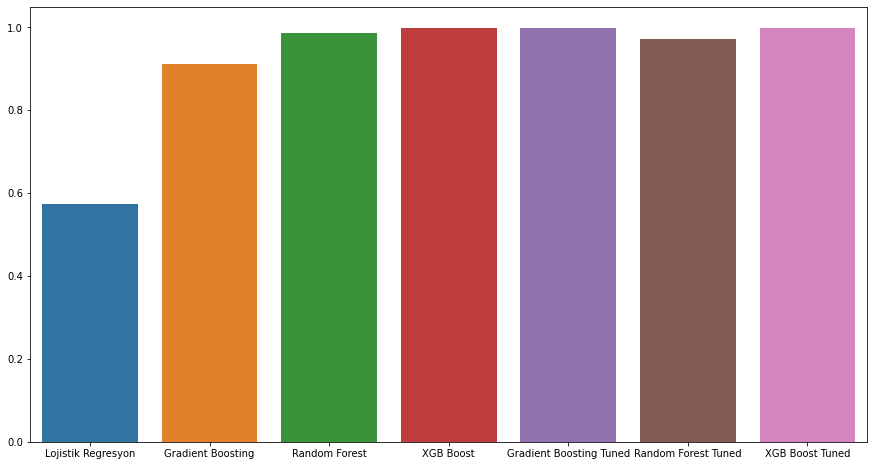

In [100]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data=score_df, orient="v",ax=ax)
plt.show()

## Test DataSet

In [101]:
test_dataset.isnull().sum()

no                        0
intercolumnar_distance    0
upper_margin              0
lower_margin              0
exploitation              0
rownumber                 0
modular_ratio             0
interlinear_spacing       0
weight                    0
peak_number               0
modinter_ratio            0
dtype: int64

In [102]:
for i in test_dataset.columns:
    q1_test = test_dataset[i].quantile(0.25)
    q3_test = test_dataset[i].quantile(0.75)
    iqr_test = q3_test-q1_test
        
    alt_sınır_test = q1_test - (iqr_test*1.5)
    üst_sınır_test = q3_test + (iqr_test*1.5)
    
    aykırı = test_dataset[(test_dataset[i].between(alt_sınır_test, üst_sınır_test, inclusive=True))][i]
    aykırı_hesap = test_dataset[i].count() - aykırı.count()
    print(f" Nitelik {i}")
    print(f"Aykırı Değer Sayısı : {aykırı_hesap}")


 Nitelik no
Aykırı Değer Sayısı : 0
 Nitelik intercolumnar_distance
Aykırı Değer Sayısı : 752
 Nitelik upper_margin
Aykırı Değer Sayısı : 360
 Nitelik lower_margin
Aykırı Değer Sayısı : 723
 Nitelik exploitation
Aykırı Değer Sayısı : 222
 Nitelik rownumber
Aykırı Değer Sayısı : 1872
 Nitelik modular_ratio
Aykırı Değer Sayısı : 240
 Nitelik interlinear_spacing
Aykırı Değer Sayısı : 1061
 Nitelik weight
Aykırı Değer Sayısı : 244
 Nitelik peak_number
Aykırı Değer Sayısı : 733
 Nitelik modinter_ratio
Aykırı Değer Sayısı : 336


C:\Users\Seher\AppData\Local\Temp/ipykernel_12300/565064508.py:9: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  aykırı = test_dataset[(test_dataset[i].between(alt_sınır_test, üst_sınır_test, inclusive=True))][i]


In [103]:
for i in test_dataset.columns:
    q1_test2 = test_dataset[i].quantile(0.25)
    q3_test2 = test_dataset[i].quantile(0.75)
    iqr_test2 = q3_test2-q1_test2
    
    alt_sınır_test2 = q1_test2 - (iqr_test2*1.5)
    üst_sınır_test2 = q3_test2 + (iqr_test2*1.5)
    
    test_dataset[test_dataset[[i]] < alt_sınır_test2] = alt_sınır_test2
    test_dataset[test_dataset[[i]] > üst_sınır_test2] = üst_sınır_test2

In [104]:
for i in test_dataset.columns:
    q1 = test_dataset[i].quantile(0.25)
    q3 = test_dataset[i].quantile(0.75)
    iqr = q3-q1
    
    alt_sınır = q1 - (iqr*1.5)
    üst_sınır = q3 + (iqr*1.5)
    
    aykırı = test_dataset[(test_dataset[i].between(alt_sınır, üst_sınır, inclusive=True))][i]
    aykırı_hesap = test_dataset[i].count() - aykırı.count()
    print(f" Nitelik {i}")
    print(f"Aykırı Değer Sayısı : {aykırı_hesap}")


 Nitelik no
Aykırı Değer Sayısı : 0
 Nitelik intercolumnar_distance
Aykırı Değer Sayısı : 0
 Nitelik upper_margin
Aykırı Değer Sayısı : 0
 Nitelik lower_margin
Aykırı Değer Sayısı : 0
 Nitelik exploitation
Aykırı Değer Sayısı : 0
 Nitelik rownumber
Aykırı Değer Sayısı : 0
 Nitelik modular_ratio
Aykırı Değer Sayısı : 0
 Nitelik interlinear_spacing
Aykırı Değer Sayısı : 0
 Nitelik weight
Aykırı Değer Sayısı : 0
 Nitelik peak_number
Aykırı Değer Sayısı : 0
 Nitelik modinter_ratio
Aykırı Değer Sayısı : 0


C:\Users\Seher\AppData\Local\Temp/ipykernel_12300/21177885.py:9: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  aykırı = test_dataset[(test_dataset[i].between(alt_sınır, üst_sınır, inclusive=True))][i]


In [105]:
test = test_dataset.drop(["no"],axis=1)

In [106]:
test_category = xgb_tuned_last.predict(test)

In [107]:
test_categorys = {"Marcus","Clarius","Philippus","Coronavirucus","other"}

In [108]:
result = {"no" : test_dataset["no"],
         "category":test_category}

In [109]:
result_df = pd.DataFrame(result)

In [110]:
def string (x):
    
    if x == 0:
        return "Marcus"
    elif x == 1:
        return "Clarius"    
    elif x == 2:
        return "Philippus"
    elif x == 3:
        return "Coronavirucus"
    elif x == 4:
        return "other"

result_df["categorys"] = result_df.apply(lambda x: string(x["category"]), axis=1)
result_df.drop(["category"], inplace=True, axis=1)

In [111]:
result_df

no  categorys
0        0     Marcus
1        1      other
2        2     Marcus
3        3     Marcus
4        4      other
...    ...        ...
8007  8007      other
8008  8008  Philippus
8009  8009     Marcus
8010  8010     Marcus
8011  8011     Marcus

[8012 rows x 2 columns]

In [112]:
after_submit = result_df.to_csv("avila.submit_after.csv")

In [112]:
result_df["categorys"].value_counts()

Marcus           3470
Clarius          1561
other            1503
Philippus         840
Coronavirucus     638
Name: categorys, dtype: int64

In [113]:
before_submit = pd.read_csv("avila.submit_before.csv")

In [114]:
before_submit["categorys"].value_counts()

Marcus           3467
Clarius          1561
other            1501
Philippus         830
Coronavirucus     653
Name: categorys, dtype: int64